# Curso de Asimilación de Datos (DCAO 2019)


### Repaso de Python, Probabilidades y Distribución Gaussiana
Los ejercicios propuestos fueron diseñados para resolverse con Python. Podría utilizarse otro lenguaje.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

### Ejercicio 1 - Probabilidades


Defina una función que repita n veces el lanzamiento de un dado y devuelva como resultado un vector (np.array) con los n numeros enteros obtenidos. La función debe recibir como argumento el número de repeticiones del experimento

In [7]:
def multiples_dados(n, low=1, high=6):
    return np.random.randint(low, high+1, size=n)

In [12]:
multiples_dados(10)

array([3, 2, 2, 2, 6, 6, 6, 3, 4, 3])

Para el lanzamiento de un dado, definimos los siguientes eventos:

* A: Se obtiene un número menor o igual a 2

* B: Se obtiene un número mayor a 3

* C: Se obtiene un número par

**Pregunta 1**: ¿Cuál es la probabilidad de cada uno de estos eventos?
A: 1/3
B: 1/2
C: 1/2

**Pregunta 2**: ¿Cuáles de estos eventos son excluyentes?
A y B


La definición frecuentista de probabilidad, indica que podemos establecer la probabilidad empírica de un evento aleatorio mediante la observación de resultados tras repetir muchas veces un experimento aleatorio. La probabilidad empírica de un evento será el número de veces en los que el experimento arrojó como resultado al evento en cuestión, divido la cantidad de veces en las que repetimos el experimento.

Utilizando la función ```multiples_dados``` definida anteriormente, calcule la probabilidad empírica del suceso A. Verifique con los resultados teóricos.

¿Cuántas veces repitió el experimento? Realice un gráfico sencillo mostrando cómo varía la probabilidad de cada suceso, en función del número de repeticiones.

Text(0,0.5,'Probability of event A')

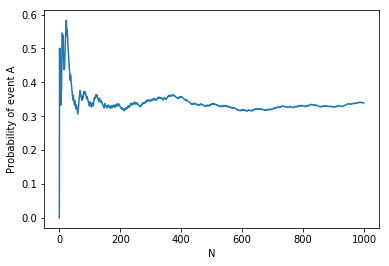

In [14]:
N = 1000
samples = multiples_dados(N)
probsA = np.array([float(np.sum(samples[:i] <= 2))/i for i in range(1, N+1)])

%matplotlib inline
plt.plot(probsA)
plt.xlabel('N')
plt.ylabel('Probability of event A')

* Verifique empíricamente que los sucesos A y C son independientes. 
* Verifique empíricamente que los seucesos B y C no son independientes

Compare con los resultados de la Pregunta 2

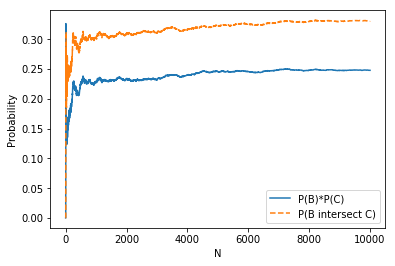

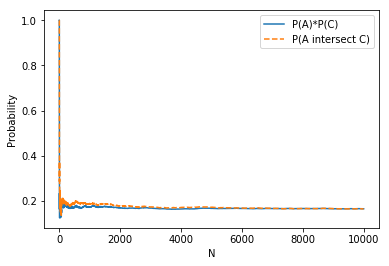

In [15]:
N = 10000
samples = multiples_dados(N)

eventA = samples <= 2
eventB = samples > 3
eventC = samples%2 == 0
eventAC = np.logical_and(eventA, eventC)
eventBC = np.logical_and(eventB, eventC)

def event_probabilities(event):
    size = len(samples)
    return np.array([float(np.sum(event[:i]))/i for i in range(1, size+1)])

events = [eventA, eventB, eventC, eventAC, eventBC]
probsA, probsB, probsC, probsAC, probsBC = (
    event_probabilities(event) for event in events
)

plt.plot(probsB * probsC, label='P(B)*P(C)')
plt.plot(probsBC, ls='--', label='P(B intersect C)')
plt.xlabel('N')
plt.ylabel('Probability')
plt.legend()
plt.show()

plt.plot(probsA * probsC, label='P(A)*P(C)')
plt.plot(probsAC, ls='--', label='P(A intersect C)')
plt.xlabel('N')
plt.ylabel('Probability')
plt.legend()
plt.show()



### Ejercicio 2 - Funciones de densidad
El tiempo (en segundos) que demoramos en conectarnos a un servidor de cómputo es una r.v. X. 
El tiempo (en segundos) que demoramos en conectarnos y autenticarnos a un servidor de cómputo es una r.v. Y

La función de densidad conjunta está dada por 

$𝑝(𝑥,𝑦)=6\cdot10^{−6}\cdot e^{(−𝑥−2𝑦)}$, para    $0<𝑥<𝑦$

¿Cuál es la probabilidad de que el tiempo de espera de conexión (X) sea menor a 2 segundos y el tiempo total (X) sea menor a 2 segundos?

$\int_{0}^{2} \int_{0}^{2} p(x,y) dxdy = \int_{0}^{2} \int_{0}^{y} 6\cdot10^{−6}\cdot e^{(−𝑥−2𝑦)} dxdy = 
$

¿Cuál es la probabilidad de que el tiempo de espera de conexión (X) sea mayor a 2 segundos?

### Ejercicio 3 - Distribución Normal y Teorema de Bayes

Considere una distribución $\mathcal{N}(5, 2^2)$

Evalúe la evolución de la media muestral y la varianza muestral en función del tamaño de la muestra, hasta n=50. (Guardar la muestra en un vector para utilizar más adelante)

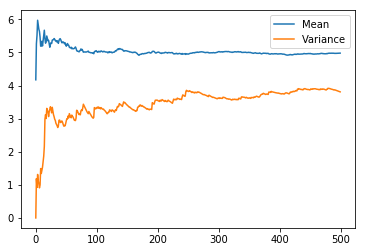

In [16]:
N = 500
sigma = 2
mu = 5
samples = sigma * np.random.randn(N) + mu

plt.plot([np.mean(samples[:i]) for i in range(1, N+1)], label='Mean')
plt.plot([np.var(samples[:i]) for i in range(1, N+1)], label='Variance')
plt.legend()

Grafique los resultados en un histograma 
(Puede utilizar la función _plt.hist_)

(array([  2.,  17.,  47.,  82., 128., 114.,  71.,  32.,   5.,   2.]),
 array([-1.09970886,  0.16725145,  1.43421176,  2.70117207,  3.96813238,
         5.23509268,  6.50205299,  7.7690133 ,  9.03597361, 10.30293392,
        11.56989423]),
 <a list of 10 Patch objects>)

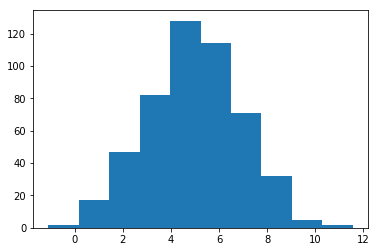

In [18]:
plt.hist(samples)

La función de densidad de probabilidad para una variable aleatoria Gaussiana es:
$$ p(x) = \frac{1}{\sigma\sqrt{2 \pi}} e^{-\frac{(x-\mu)^2}{2 \sigma^2}} \,  $$

Escriba una función que devuelva el valor de $p(x)$ a partir de x

In [19]:
def pdf_norm(x,mu=0,s=1):
    return 1/(s*np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2 / (2*s**2))

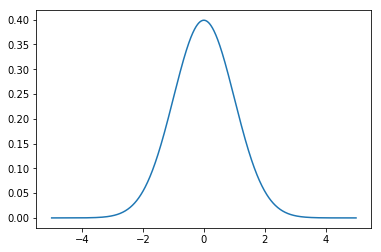

In [20]:
grid = np.linspace(-5, 5, 1000)
plt.plot(grid, pdf_norm(np.linspace(-5, 5, 1000)))

Grafique las siguientes funciones de densidad:
1. $p(x) = \mathcal{N}(-2,\sigma_b^2)$
2. $p(y|x)= \mathcal{N}(1,\sigma_o^2)$

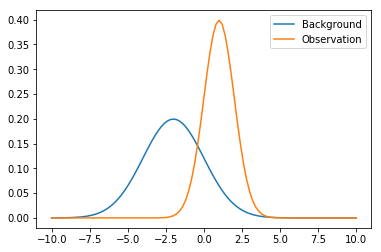

In [21]:
N = 101                # Nro. puntos de grilla
xx = np.linspace(-10,10,N) # Grilla regular
dx = xx[1]-xx[0]
sigma_b = 2
sigma_o = 1

plt.plot(xx, pdf_norm(xx, mu=-2, s=sigma_b), label='Background')
plt.plot(xx, pdf_norm(xx, mu=1, s=sigma_o), label='Observation')
# plt.xlabel('x')
# plt.ylabel('p(x)')
plt.legend()

Computacionalmente, utilizaremos las representaciones discretas de las funciones de densidad en la grilla definida por la variable xx. Realizaremos operaciones entre las pdfs utilizando productos y divisiones punto-a-punto en la grilla.   

Podríamos inferir la distribución posterior $p(x|y)$ utilizando el teorema de Bayes:
$$ p(x|y) = \frac{p(x) \, p(y|x)}{p(y)}$$

Para esto necesitamos calcular la pdf del denomidador. Esta densidad $p(y)$ no depende de x, por lo que su valor es una constante. De hecho, actúa como un factor de normalización. Halle dicho valor. (Ayuda: Pensar a $p(y)$ como una pdf marginalizada, adaptando estos datos a nuestro contexto de grilla.)

In [22]:
def bayes(prior, likelihood, xx):
    dx = xx[1] - xx[0]
    normalization = np.sum(prior(xx) * likelihood(xx) * dx)
    return prior(xx) * likelihood(xx) / normalization

Calcule finalmente $p(x|y)$ y grafique las tres funciones de densidad. Guardar la figura a un archivo.

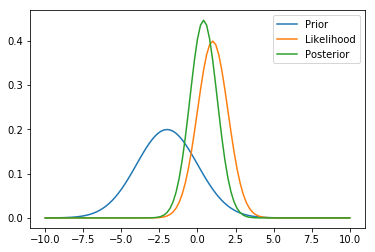

In [23]:
prior = lambda x: pdf_norm(x, mu=-2, s=sigma_b)
likelihood = lambda x: pdf_norm(x, mu=1, s=sigma_o)
plt.plot(xx, prior(xx), label='Prior')
plt.plot(xx, likelihood(xx), label='Likelihood')
plt.plot(xx, bayes(prior, likelihood, xx), label='Posterior')
plt.legend()

Analizar y comparar qué ocurre al  aumentar o reducir los valores de  $\sigma_o$. ¿Que ocurre para valores sumamente altos/pequeños de $\sigma_o$. ¿Ocurrirá algo similar al modificar $\sigma_b$? 

<IPython.core.display.Javascript object>


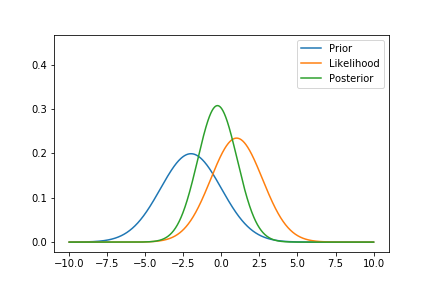

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTEuMCwgZGVzY3JpcHRpb249dSckXFxzaWdtYV9vJCcsIG1heD00LjAsIG1pbj0wLjIpLCBGbG9hdFNsaWRlcih2YWx1ZT3igKY=


In [24]:
# Repito el comando porque a veces necesita insitencia para cambiar el backend
# Incluso así es posible que se necesite correr la celda varias veces hasta que funcione
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

fig, ax = plt.subplots()
xx = np.linspace(-10, 10, 1000)
prior = lambda x: pdf_norm(x, mu=-2, s=sigma_b)
likelihood = lambda x: pdf_norm(x, mu=1, s=sigma_o)
l1, = ax.plot(xx, prior(xx), label='Prior')
l2, = ax.plot(xx, likelihood(xx), label='Likelihood')
l3, = ax.plot(xx, bayes(prior, likelihood, xx), label='Posterior')
plt.legend()
plt.show()

@interact(sb=widgets.FloatSlider(value=sigma_b, min=0.2, max=4, step=0.1, description=r'$\sigma_b$'),
          so=widgets.FloatSlider(value=sigma_o, min=0.2, max=4, step=0.1, description=r'$\sigma_o$'))
def plot_bayes(so, sb):
    xx = np.linspace(-10, 10, 1000)
    prior = lambda x: pdf_norm(x, mu=-2, s=sb)
    likelihood = lambda x: pdf_norm(x, mu=1, s=so)
    l1.set_ydata(prior(xx))
    l2.set_ydata(likelihood(xx))
    l3.set_ydata(bayes(prior, likelihood, xx))
    plt.legend()
    plt.show()

### Ejercicio 4 - Distribución Gaussiana multivariada

Tenemos un vector aleatoria $X\in R^3$, con distribución Gaussiana centrada (i.e. media cero) y covarianza Q,
$$Q=
\begin{bmatrix}
4 &2  &-1 \\ 
 2& 4 &0 \\ 
 -1&  0&2 
\end{bmatrix}
$$

**Pregunta 1:** ¿Que podemos decir acerca de la variabilidad de  cada una de las variables de $X$?

Tenemos varianza 4 para $X_1$ y $X_2$ y varianza 2 para $X_3$. Además tenemos covarianzas no nulas entre $X_1$ y las otras dos variables.

Podemos verificar realizando scatter plots de una muestra aleatoria de la distribución.

Para las variables $X_1$ y $X_2$, que ocurre con la muestra si la covarianza entre estas variables aumenta o disminuye mucho?

Vamos a ver que los puntos de la muestra de $X_1$ y $X_2$ se estiran sugiriendo una relación lineal.

(3, 100)


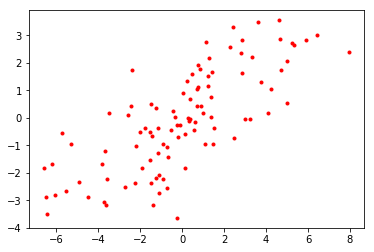

In [31]:
%matplotlib inline
nx = 3
mu = np.zeros(nx)
Q = np.array([
    [10, 5, -1],
    [5, 4, 0],
    [-1, 0, 2]
])
N = 100

samples = sc.stats.multivariate_normal(mean=mu, cov=Q).rvs(N).T
print(samples.shape)
plt.plot(samples[0, :], samples[1, :], 'r.')

Sea $Z\in R^8$ una variable aleatoria con distribución Gaussiana, $Z\sim \mathcal{N}(0,4I)$ 

* Genere una muestra aleatoria de $Z$ con 100 elementos. 
* Calcule la covarianza empírica de la muestra y repita el experimento hasta que la matriz de covarianza obtenida sea similar a la covarianza teórica de $Z$.  ¿Que tamaño de muestra seleccionó?

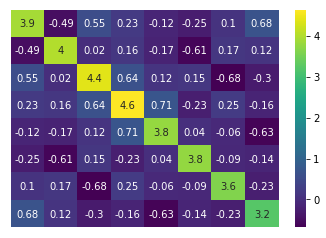

In [33]:
nx = 8
N = 100
mu = np.zeros(nx)
Q = 4 * np.eye(nx)
samples = sc.stats.multivariate_normal(mu, Q).rvs(100).T

import seaborn as sns
sns.heatmap(np.cov(samples).round(2), annot=True, xticklabels=False, yticklabels=False, cmap='viridis')

<IPython.core.display.Javascript object>


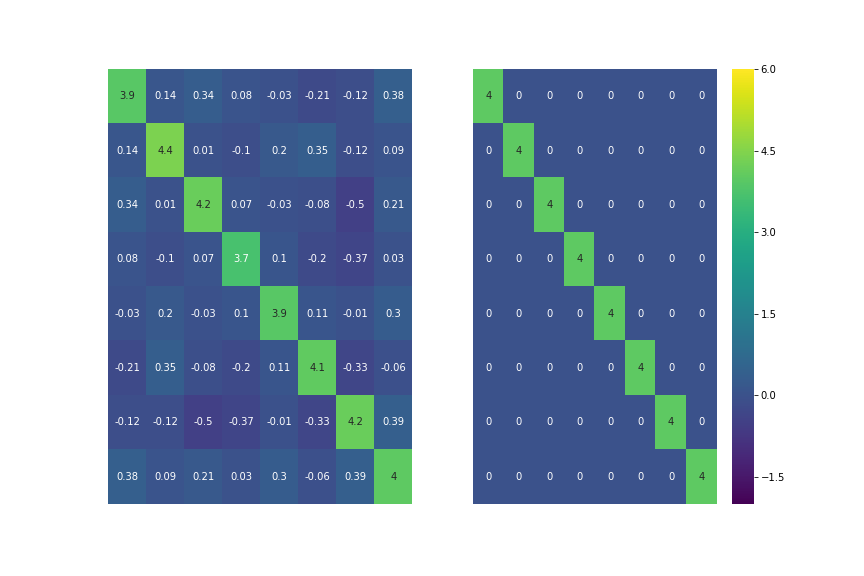

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0yMCwgZGVzY3JpcHRpb249dSdOJywgbWF4PTEwMDAsIG1pbj0yMCwgc3RlcD0yMCksIE91dHB1dCgpKSwgX2RvbV9jbGFzc2XigKY=


In [34]:
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12, 8]

fig, (ax1, ax2) = plt.subplots(1, 2)
sns.heatmap(Q, annot=True, xticklabels=False, yticklabels=False, cmap='viridis', ax=ax2, vmin=-2, vmax=6)
@interact(N=widgets.IntSlider(value=20, min=20, max=1000, step=20, description='N'))
def plot_Q_estimates(N):
    ax1.clear()
    samples = sc.stats.multivariate_normal(mu, Q).rvs(N).T
    sns.heatmap(np.cov(samples).round(2), annot=True, xticklabels=False, yticklabels=False,
                cmap='viridis', ax=ax1, vmin=-2, vmax=6, cbar=False)



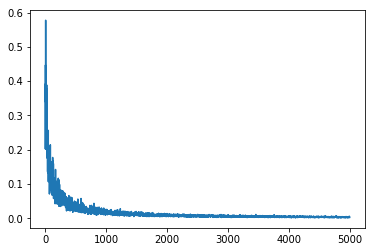

In [35]:
%matplotlib inline

N = 5000
estimation_errors = np.zeros(N)
offset = 50
for i in range(N):
    sample_size = i + offset
    samples = sc.stats.multivariate_normal(mu, Q).rvs(sample_size).T
    Q_estimate = np.cov(samples)
    estimation_errors[i] = np.mean((Q - Q_estimate)**2)
plt.plot(estimation_errors)


### Modelos Autorregresivos

* Construir un modelo AR(1).
* Realizar N=1000 simulaciones durante 500 pasos de tiempo.
* ¿Cuál es la media empírica en t=10? ¿Cuál es la covarianza empírica entre los tiempos $t_{50}$ y $t_{100}$? ¿Y entre $t_{400}$ y $t_{450}$?
* Que efecto tiene el parametro $\alpha$

In [106]:
def simulate_AR_1(N, alpha=0.9, sd=1, x0=0):
    x = np.zeros(N)
    x[0] = x0
    for i in range(1, N):
        x[i] = alpha * x[i-1] + sd * np.random.randn()
    return x

In [107]:
# Simulación
N_repeats = 1000
N_times = 200
X = np.zeros((N_repeats, N_times))
for i in range(N_repeats):
    X[i, :] = simulate_AR_1(N_times)
    

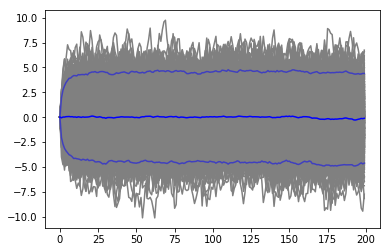

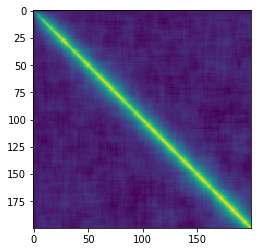

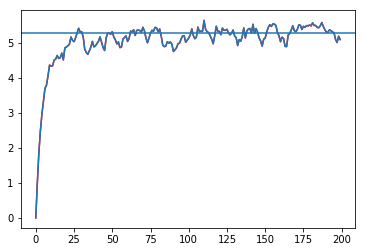

In [112]:
for i in range(N_repeats):
    plt.plot(X[i, :], '0.5')
plt.plot(np.mean(X, axis=0), 'b')
plt.plot(np.mean(X, axis=0) + 2*np.std(X, axis=0), 'b', alpha=0.5)
plt.plot(np.mean(X, axis=0) - 2*np.std(X, axis=0), 'b', alpha=0.5)
plt.show()

plt.imshow(np.cov(X.T))
plt.show()

plt.plot(np.var(X, axis=0), 'r')
# np.var(X, axis=0) == np.diag(np.cov(X.T)
# plt.plot(np.diag(np.cov(X.T)))
plt.axhline((1**2) / (1-(0.9**2)))


In [113]:
alphas = [0.15, 0.4, 0.65, 0.9]
N_repeats = 500
N_times = 200
X = np.zeros((N_repeats, len(alphas), N_times))

for j, alpha in enumerate(alphas):
    for i in range(N_repeats):
        X[i, j, :] = simulate_AR_1(N_times, alpha=alpha, x0=10)

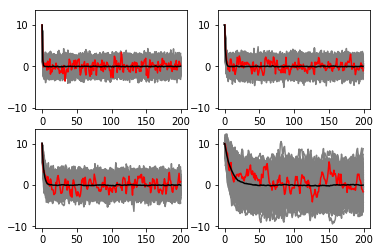

In [114]:
fig, axes = plt.subplots(2, 2)

xmin = np.min(X) + 0.1 * np.min(X)
xmax = np.max(X) + 0.1 * np.max(X)
axes[0, 0].set_ylim(xmin, xmax)
axes[0, 1].set_ylim(xmin, xmax)
axes[1, 0].set_ylim(xmin, xmax)
axes[1, 1].set_ylim(xmin, xmax)


for i in range(N_repeats):
    axes[0, 0].plot(X[i, 0, :], '0.5')
    axes[0, 1].plot(X[i, 1, :], '0.5')
    axes[1, 0].plot(X[i, 2, :], '0.5')
    axes[1, 1].plot(X[i, 3, :], '0.5')

axes[0, 0].plot(X[0, 0, :], 'r')
axes[0, 1].plot(X[0, 1, :], 'r')
axes[1, 0].plot(X[0, 2, :], 'r')
axes[1, 1].plot(X[0, 3, :], 'r')
    
axes[0, 0].plot(np.mean(X[:, 0, :], axis=0), 'k')
axes[0, 1].plot(np.mean(X[:, 1, :], axis=0), 'k')
axes[1, 0].plot(np.mean(X[:, 2, :], axis=0), 'k')
axes[1, 1].plot(np.mean(X[:, 3, :], axis=0), 'k')


In [117]:
def simulate_gordon_time_series(N, x0=0, sigma_sq=10, a=0.5, b=25, amp=8, freq=1.2):
    x = np.zeros(N)
    x[0] = x0
    for i in range(1, N):
        x[i] = a*x[i-1] + b*x[i-1] / (1+x[i-1]**2)
        x[i] += amp * np.cos(freq*(i-1))
        x[i] += np.sqrt(sigma_sq) * np.random.randn()
    return x

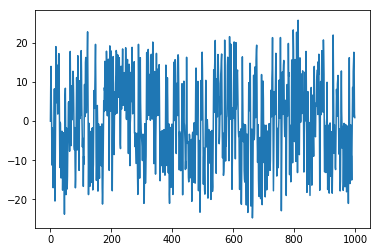

In [118]:
plt.plot(simulate_gordon_time_series(1000))

In [122]:
perturbation_sigma = 0.01
N_samples = 1000
perturbed_x0 = x[100] + np.random.randn(N_samples) * perturbation_sigma
N_steps = 10
X = np.zeros((N_samples, N_steps))

for i in range(N_samples):
    X[i, :] = simulate_gordon_time_series(10, x0=perturbed_x0[i])

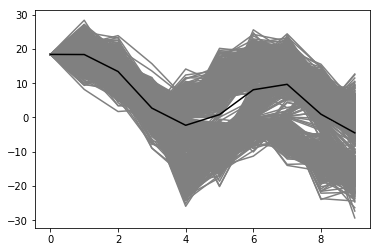

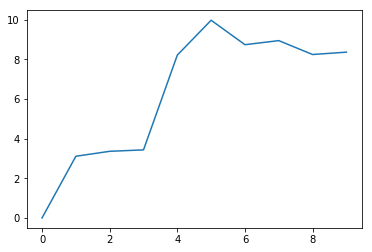

In [124]:
for i in range(N_samples):
    plt.plot(X[i, :],'0.5')
plt.plot(np.mean(X, axis=0), 'k')
plt.show()

plt.plot(np.std(X, axis=0))

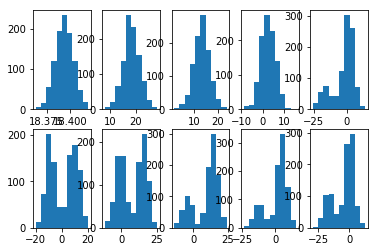

In [131]:
fig, axes = plt.subplots(2, 5)

for i, ax in enumerate(axes.reshape(-1)):
    ax.hist(X[:, i])

### Modelo Lorenz 63 
Utilizando el código provisto, realizar simulaciones con el modelo lorenz 63.


* Plotear la evolución de dos de las variables

* Volver a integrar el modelo 5 veces perturbando levemente la condición inicial. ¿Existen regiones del espacio en los que el estado del es más predecible?

* Rehacer la simulación N veces usando la condicion inicial real pero perturbando levemente los parámetros

* Grafique el error medio del ensamble como función del tiempo

* Podemos eliminar las divergencias reduciendo el timestep?

* Deseamos asimilar las variables del modelo de Lorenz pero sólo podemos observar dos variables: $z$ y $x+y$. ¿Qué forma tendrá el operado de observación $\mathbf{H}$?